In [1]:
# Sample Data - People Name, Age and Income
# Data File - Data/income.csv

In [2]:
# import necessary packages
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load Data into dataframe
df = pd.read_csv('Data/income.csv')
# Explore Data by head()
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
# Get more info about data using df.describe
df.describe()

,Age,Income($)
count,22.000000,22.000000
mean,34.818182,90431.818182
std,5.901060,43505.964412
min,26.000000,45000.000000
25%,29.000000,58500.000000
50%,36.500000,67500.000000
75%,39.750000,135250.000000
max,43.000000,162000.000000


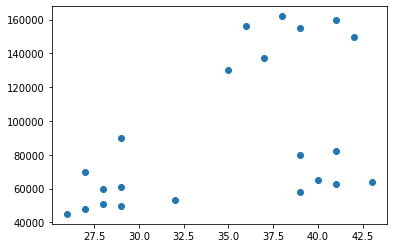

In [5]:
# Visualize data
plt.scatter(df['Age'],df['Income($)'])

In [6]:
# Define Model
km = KMeans(n_clusters=3)

In [12]:
# fit and predict
predicted = km.fit_predict(df.drop('Name', axis=1)) # Name col is string not useful for numerical calc

In [14]:
# Assign cluster to df
df['cluster'] = predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [15]:
# Sperate groups into different dataframes
df1,df2,df3 = df[df.cluster==0],df[df.cluster==1],df[df.cluster==2]

Text(0, 0.5, 'Income')

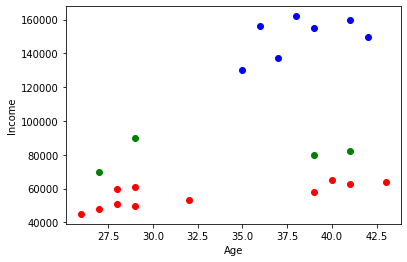

In [17]:
# Visualized those 3 cluster in scatter plot
plt.scatter(df1['Age'],df1['Income($)'],color = 'red')
plt.scatter(df2['Age'],df2['Income($)'],color = 'blue')
plt.scatter(df3['Age'],df3['Income($)'],color = 'green')

# set labels to graph
plt.xlabel('Age')
plt.ylabel('Income')

In [18]:
# In the above graph you can see that the clusters are not properly classified because we have not scaled those features yet.
# To scale features we can use sklearn MinMax Scaler
scaler = MinMaxScaler()

In [32]:
# Scale Age and Income column
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [40]:
# Retrain with scaled values and assign clusters
predicted = km.fit_predict(df.drop(['Name','cluster'], axis=1))
df['cluster'] = predicted

Text(0, 0.5, 'Income')

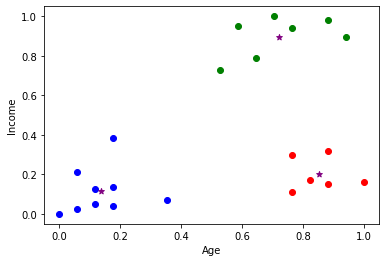

In [42]:
# Sperate groups into different dataframes
df1,df2,df3 = df[df.cluster==0],df[df.cluster==1],df[df.cluster==2]
# Visualized those 3 cluster in scatter plot
plt.scatter(df1['Age'],df1['Income($)'],color = 'red')
plt.scatter(df2['Age'],df2['Income($)'],color = 'blue')
plt.scatter(df3['Age'],df3['Income($)'],color = 'green')
# To mark centriods of all clusters
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple', marker = '*' )

# set labels to graph
plt.xlabel('Age')
plt.ylabel('Income')

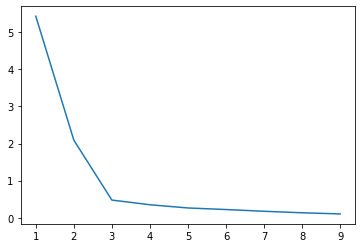

In [46]:
# To get the best K value we will use some technique called Elbow Method 
# Elbow Method is nothing but it will find sum of square error with some k and plot in a scatter plot to get best K
sse = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(df.drop(['Name','cluster'], axis = 1))
    sse.append(km.inertia_) # This is the Sum of Square Errors

plt.plot(range(1,10),sse)